In [2]:
import nltk
import spacy
import pandas as pd

nlp = spacy.load('en') #loading English


#opening csv
myfile = open('/home/gayathri/project/MakeComplaint/data.csv').read()
data=nlp(myfile)

#df=pd.DataFrame(data=data)
#df=nlp(df)
#print(df)
print(type(data))
for token in data[:8]:
    print(token.text)
#fetching the headers

#for colname in frames:
    #print(colname.columns)
    
    
    
#keys = ['Water Authority','KSEB','KSRTC','PWD','Environment and climate change','MVD']
#df=pd.concat(frames,keys=keys)
#df



#print(doc_file)

#tokenizer=nltk.tokenize.TreebankWordTokenizer()
#tokens=tokenizer.tokenize(text)
#print("Tree", tokens)

<class 'spacy.tokens.doc.Doc'>
id
,
Subject
,
Complaint
,
Departments




In [3]:
import pandas as pd
import matplotlib.pyplot as plt

dataset= pd.read_csv('/home/gayathri/project/MakeComplaint/data.csv')
dataset['Departments'].unique() 

array(['Water Authority', 'PWD', 'KSEB', 'KSRTC',
       'Environment and climate change'], dtype=object)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dataset= pd.read_csv('/home/gayathri/project/MakeComplaint/data.csv')

dataset.head()







,id,Subject,Complaint,Departments
0,1,No water supply connection.,No water pipeline connection in amma gardens r...,Water Authority
1,2,Road retarring.\n,I am a resident of Sreekaryam Ambadi Nagar la...,PWD
2,3,Power cuts without a prior notice.,As everyone knows that electricity is the majo...,KSEB
3,4,Scarcity of water in day time.,There is scarcity of water in my area Vanchiyo...,Water Authority
4,5,Water scarcity,There is a huge scarcity of water in remote ar...,Water Authority


(-1.1086897416520078,
 1.1004137972215242,
 -1.1109495487246994,
 1.1111298034400208)

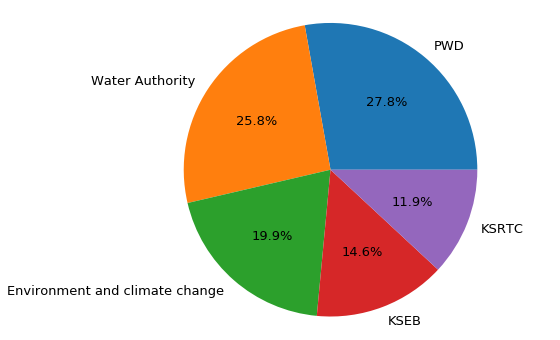

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

dataset= pd.read_csv('/home/gayathri/project/MakeComplaint/data.csv')




dataset.Departments.value_counts().plot(kind='pie', 
                                  figsize=(8,6), 
                                  fontsize=13, 
                                  autopct='%1.1f%%', 
                                  wedgeprops={'linewidth': 5}
                                  )
plt.axis('off')
plt.axis('equal')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
import nltk
from nltk.tokenize import word_tokenize 
from collections import Counter
from gensim.summarization import summarize



#Data cleaning

# 1. unpunctuate /home/gayathri/Complaint/MakeComplaint/
# 2. to lower
# 3. Remove numerals
# 4. Remove Newline for subject


# Data loading
dataset= pd.read_csv('/home/gayathri/project/MakeComplaint/data.csv')


# unpunctuate and lower case
dataset['Subject'] = dataset['Subject'].str.replace('[^\w\s]','').str.lower()


# unpunctuate and lower case
dataset['Complaint'] = dataset['Complaint'].str.replace('[^\w\s]','').str.lower() 


#rRemoving new lines in the subject field
dataset['Subject'] = dataset['Subject'].str.rstrip('\n')

#removing Numeric 
dataset['Complaint'] = dataset['Complaint'].str.replace('[^a-zA-Z ]','').str.lower()
#print(dataset.head())



# creating dataframe for each departments
water = dataset.loc[dataset['Departments'] == 'Water Authority']
pwd = dataset.loc[dataset['Departments'] == 'PWD']
ksrtc = dataset.loc[dataset['Departments'] == 'KSRTC']
kseb = dataset.loc[dataset['Departments'] == 'KSEB']
env = dataset.loc[dataset['Departments'] == 'Environment and climate change']

#print(env.shape)    #(30, 4)
#print(water.shape)  #(39, 4)
#print(pwd.shape)    #(42, 4)
#print(ksrtc.shape)  #(17, 4)
#print(kseb.shape)   #(22, 4)
#dataset.head()
#print(pwd)

#Filtering out Subjects and complaints from the dataframe
df_water = water[['Subject','Complaint']]
df_pwd   = pwd[['Subject','Complaint']]
df_ksrtc = ksrtc[['Subject','Complaint']]
df_kseb  = kseb[['Subject','Complaint']]
df_env   = env[['Subject','Complaint']]

dfwater  = df_water[['Subject','Complaint']]
dfpwd    = df_pwd[['Subject','Complaint']]
dfksrtc  = df_ksrtc[['Subject','Complaint']]
dfkseb   = df_kseb[['Subject','Complaint']]
dfenv    = df_env[['Subject','Complaint']]


#Dataframe with complaint and subject as one column = Water
dfwater['Subject_and_Complaint'] = df_water['Subject'] + " "+ df_water['Complaint']
dfwater=dfwater[['Subject_and_Complaint']]





#Dataframe with complaint and subject as one column = PWD
dfpwd['Subject_and_Complaint'] = df_pwd['Subject'] + " "+ df_pwd['Complaint']
dfpwd=dfpwd[['Subject_and_Complaint']]
#print(dfpwd)

#Dataframe with complaint and subject as one column = ksrtc
dfksrtc['Subject_and_Complaint'] = df_ksrtc['Subject'] + " "+ df_ksrtc['Complaint']
dfksrtc=dfksrtc[['Subject_and_Complaint']]
#print(dfksrtc)

#Dataframe with complaint and subject as one column = kseb
dfkseb['Subject_and_Complaint'] = df_kseb['Subject'] + " "+ df_kseb['Complaint']
dfkseb=dfkseb[['Subject_and_Complaint']]
#print(dfkseb)


#Dataframe with complaint and subject as one column = env
dfenv ['Subject_and_Complaint'] = df_env['Subject'] + " "+ df_env['Complaint']
dfenv =dfenv [['Subject_and_Complaint']]
print(dfenv )

#==================================Tokenization Begins : =============================================


                     


water_token = []
water_list=[]
#Tokenising water data
stop_words = set(stopwords.words('english'))
for i, row in dfwater.iterrows():
    #print(i,row['Subject'], row['Complaint'])
    #tokenizer=nltk.tokenize.TreebankWordTokenizer()
    water_token = word_tokenize(row['Subject_and_Complaint'])
    result = [i for i in water_token if not i in stop_words]
    water_list.append(result)
print("+++WATER TOKENS+++")
print(water_list)
    #water_token.append(tokenizer.tokenize(row['Subject_and_Complaint']))

   
   

#print(type(tokens))



pwd_token = []

pwd_list = []
#Tokenising pwd data    
for i, row in dfpwd.iterrows():
    #print(i,row['Subject'], row['Complaint'])
    pwd_token = word_tokenize(row['Subject_and_Complaint'])

    result1 = [i for i in pwd_token if not i in stop_words]
    pwd_list.append(result1)
print("\n+++PWD Tokens+++")
print(pwd_list)
#print( pwd_token)

ksrtc_token =[]
ksrtc_list =[]
#Tokenising ksrtc data    
for i, row in dfksrtc.iterrows():
    #print(i,row['Subject'], row['Complaint'])
    ksrtc_token = word_tokenize(row['Subject_and_Complaint'])
    result = [i for i in ksrtc_token if not i in stop_words]
    ksrtc_list.append(result)
#print(ksrtc_list)
#print( ksrtc_token)

kseb_token = []
kseb_list= []
#Tokenising kseb data    
for i, row in dfkseb.iterrows():
    #print(i,row['Subject'], row['Complaint'])
    kseb_token = word_tokenize(row['Subject_and_Complaint'])
    result = [i for i in kseb_token if not i in stop_words]
    kseb_list.append(result)
#print(kseb_list)
#print(kseb_token)




    
    

env_token = []
env_list = []
#Tokenising env data    
for i, row in dfenv.iterrows():
    #print(i,row['Subject'], row['Complaint'])
    env_token = word_tokenize(row['Subject_and_Complaint'])
    result = [i for i in env_token if not i in stop_words]
    env_list.append(result)
#print(env_list)
#print(env_token)


#word frequencies  Environment department

wordfreq = [1]

count = 0
for word  in env_list: 
    count+=1
    wordfreq.append([])
    for i in word:
        
        wordfreq[count].append(word.count(i))
#print(env_list)

wordfreq.pop(0)
#print(wordfreq)
#print(len(wordfreq))
#print(len(env_list))

env_freq=list(map(dict, map(zip, env_list, wordfreq)))
print("\n========= Word Frequency of Environment =========== \n\n")
print(env_freq)

#word frequencies  KSEB department

wordfreq = [1]
count = 0
for word  in kseb_list:
    count+=1
    wordfreq.append([])
    for i in word:
        wordfreq[count].append(word.count(i))
wordfreq.pop(0)

kseb_freq=list(map(dict, map(zip, kseb_list, wordfreq)))
print("\n========= Word Frequency of KSEB =========== \n\n")
#print(kseb_freq)


#word frequencies  KSRTC department

wordfreq = [1]
count = 0
for word  in ksrtc_list:
    count+=1
    wordfreq.append([])
    for i in word:
        wordfreq[count].append(word.count(i))
wordfreq.pop(0)

ksrtc_freq=list(map(dict, map(zip, ksrtc_list, wordfreq)))
print("\n========= Word Frequency of KSEB =========== \n\n")
print(type(ksrtc_freq))


#word frequencies  pwd department

wordfreq = [1]
count = 0
for word  in pwd_list:
    count+=1
    wordfreq.append([])
    for i in word:
        wordfreq[count].append(word.count(i))
wordfreq.pop(0)

pwd_freq=list(map(dict, map(zip, pwd_list, wordfreq)))
print("\n========= Word Frequency of PWD =========== \n\n")
#print(pwd_freq)

#word frequencies  water department

wordfreq = []
count = 0
for word  in water_list:
    count+=1
    #wordfreq.append([])
    for i in word:
        wordfreq[count].append(word.count(i))
#wordfreq.pop(0)

water_freq=list(map(dict, map(zip, water_list, wordfreq)))
print("\n========= Word Frequency of WATER =========== \n\n")

print(water_freq)

# Finding the most repeated words
water_lis =[]
water_freq_list = { }
for lists in water_freq:
    water_freq_list.update({})
    lists=dict(lists)
    items = [(v, k) for k, v in lists.items()]
    items.sort()
    items.reverse()
    items = [k for v, k in items]
    #print(items)
    water_dict=(items[:4])
    water_lis.append(water_dict)
#print(water_lis)

    
#print(water_lis)  

# Finding the most repeated words pwd
pwd_lis =[]
pwd_freq_list = { }
for lists in pwd_freq:
    pwd_freq_list.update({})
    lists=dict(lists)
    items = [(v, k) for k, v in lists.items()]
    items.sort()
    items.reverse()
    items = [k for v, k in items]
    #print(items)
    pwd_dict=(items[:4])
    pwd_lis.append(pwd_dict)
print(pwd_lis)

# Finding the most repeated words kseb
kseb_lis =[]
kseb_freq_list = { }
for lists in kseb_freq:
    kseb_freq_list.update({})
    lists=dict(lists)
    items = [(v, k) for k, v in lists.items()]
    items.sort()
    items.reverse()
    items = [k for v, k in items]
    #print(items)
    kseb_dict=(items[0:4])
    kseb_lis.append(kseb_dict)
#print(kseb_lis)
        
# Finding the most repeated words ksrtc
ksrtc_lis =[]
ksrtc_freq_list = { }
for lists in ksrtc_freq:
    kseb_freq_list.update({})
    lists=dict(lists)
    items = [(v, k) for k, v in lists.items()]
    items.sort()
    items.reverse()
    items = [k for v, k in items]
    #print(items)
    ksrtc_dict=(items[:4])
    ksrtc_lis.append(ksrtc_dict)
#print(ksrtc_lis)
    
# Finding the most repeated words env
env_lis =[]
env_freq_list = { }
for lists in env_freq:
        
    env_freq_list.update({})
    lists=dict(lists)
    #print(lists)
    items = [(v, k) for k, v in lists.items()]
    #print(type(items))
    items.sort()
    items.reverse()
    items = [k for v, k in items]
    print(items)
    env_dict=(items[0:4])
    #print("\n\nENVDICT\n\n")
    #print(env_dict)
    env_lis.append(env_dict) 
print("\n\n ENV list \n\n")
print(env_lis)


# Keyword extraction using Libaray
#print(dfenv)
#for i, row in dfenv.iterrows():
    
    #env_token = summarize(row['Subject_and_Complaint'])
    #print(env_token)
    #result = [i for i in env_token if not i in stop_words]
    #env_list.append(env_token)
#print(env_list)
                

    

                                 Subject_and_Complaint
12   increasing deaths from air pollution \nair pol...
13   waste disposal to water bodies people make riv...
19   illegal sand mines due to the sand mining ther...
20   waste disposal on roads in our areas during ni...
33   fishes dying massively fishes in the river pam...
40   construction of paddy fields construction is g...
42   water pollution is a major issue many industri...
43   burning of plastics issue burning of plastics ...
44   waste collecting mechanism dumping of wastes i...
45   save water bodies activities like waste dispos...
46   overfishing in rivers overfishing which causes...
47   light pollution artificial light at night is o...
48   we make a lot of ewaste the electronic waste p...
49   ocean acidification ocean acidification is cau...
50   city dwellers are prone to noise pollution noi...
58   cutting down of trees now a days many people a...
62   pollution by ksrtc bus pollution by ksrtc bus ...
65   horri

IndexError: list index out of range